In [3]:
import pandas as pd
import numpy as np 
from glob import glob
import cv2
from skimage import io 
from tqdm import tqdm
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras import layers
import tensorflow.keras.optimizers as Optimizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, Activation, 
    MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D, GlobalMaxPooling2D, add
)
import pandas as pd
import numpy as np 
from glob import glob
import cv2
from skimage import io 
from tqdm import tqdm
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras import layers
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input

In [4]:
ground_truth_df = pd.read_csv("ISIC_2019_Training_GroundTruth.csv")
meta_data_df = pd.read_csv("ISIC_2019_Training_Metadata.csv")
ground_truth_df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
cols=['NV','BCC','AK','BKL','DF','VASC','SCC','MEL', "UNK"]


In [6]:
for i in range(0, len(cols)):
    print("Total images of " + cols[i] + " : " + str(len(ground_truth_df[ground_truth_df[cols[i]]>0])))

Total images of NV : 12875
Total images of BCC : 3323
Total images of AK : 867
Total images of BKL : 2624
Total images of DF : 239
Total images of VASC : 253
Total images of SCC : 628
Total images of MEL : 4522
Total images of UNK : 0


In [7]:
meta_data_df

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [8]:
data_df= meta_data_df.merge(ground_truth_df, how= 'inner', on='image').sample(frac=1).reset_index(drop=True) #frac keyword speicifies the fraction of rows to return in the random sample so frac =1 meants to retuen all rows in random order
data_df

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0072652,65.0,palms/soles,BCN_0002336,female,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0030839,70.0,posterior torso,HAM_0006926,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0065677,65.0,palms/soles,BCN_0001036,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0028486,65.0,head/neck,HAM_0005981,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0029067,65.0,upper extremity,HAM_0000498,male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0024748,45.0,anterior torso,HAM_0003420,male,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25327,ISIC_0054962,15.0,anterior torso,BCN_0000496,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25328,ISIC_0013164_downsampled,60.0,lower extremity,MSK4_0010430,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0028691,50.0,anterior torso,HAM_0001161,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Anatomical Location')]

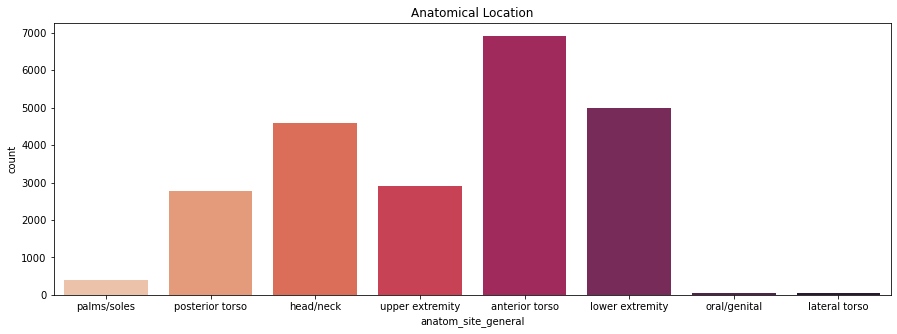

In [36]:
import seaborn as sns
plt.figure(figsize=(15,5))

sns.countplot(data_df["anatom_site_general"], palette="rocket_r").set(title="Anatomical Location")

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'sex')]

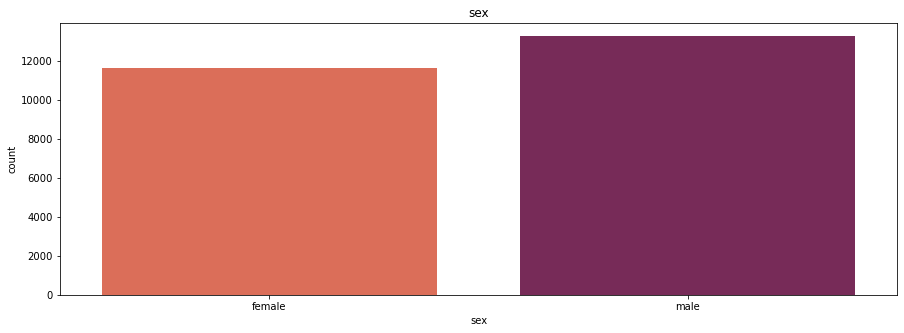

In [34]:
import seaborn as sns
plt.figure(figsize=(15,5))

sns.countplot(data_df["sex"], palette="rocket_r").set(title="sex")

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Age Range')]

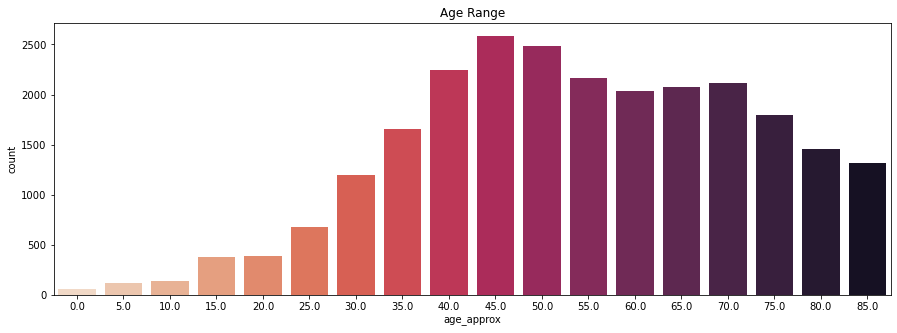

In [37]:
import seaborn as sns
plt.figure(figsize=(15,5))

sns.countplot(data_df["age_approx"], palette="rocket_r").set(title="Age Range")

In [47]:

    
category_data = [["Melanocytic nevus", 12875], ["Basal cell carcinoma", 3323], ["Actinic keratosis", 867], ["Benign keratosis", 2624], ["Dermatofibroma", 239], ["Vascular lesion", 253], ["Squamous cell carcinoma", 628], ["Melanoma", 4522]]
df_category= pd.DataFrame(category_data, columns =["Category", "Count"])


In [54]:
df_category= df_category.sort_values("Count")
df_category

,Category,Count
4,Dermatofibroma,239
5,Vascular lesion,253
6,Squamous cell carcinoma,628
2,Actinic keratosis,867
3,Benign keratosis,2624
1,Basal cell carcinoma,3323
7,Melanoma,4522
0,Melanocytic nevus,12875


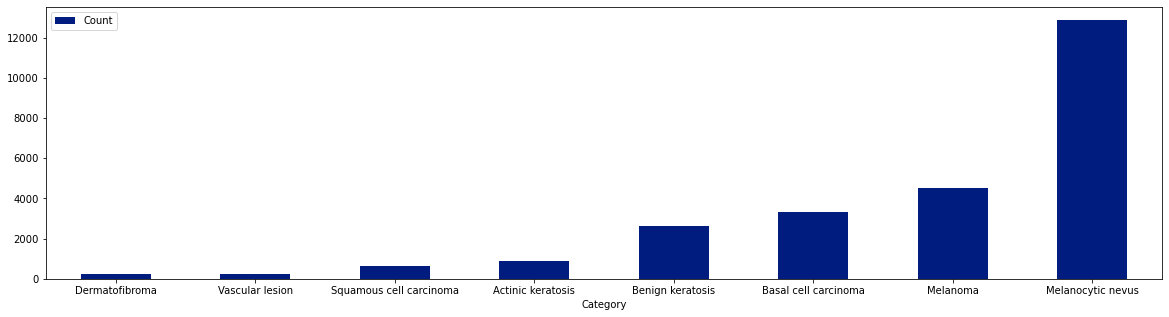

In [87]:
#category= 'Category'
#x= np.arrange(len(category)
ax = df_category.plot.bar(x="Category", y='Count', rot=0, figsize=(20,5))


In [89]:
print (plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


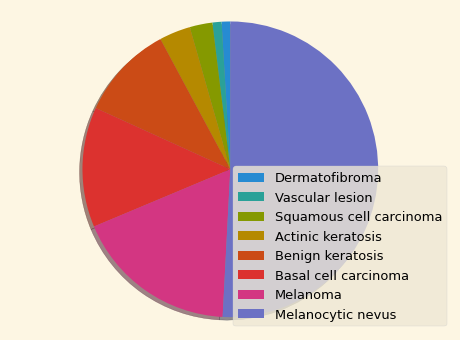

In [95]:
labels = df_category.Category
sizes = df_category.Count
plt.style.use("Solarize_Light2")
plt.figure(figsize=(8,6))
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="lower right")
plt.axis('equal')
plt.show()

In [74]:
CFG = dict(
        batch_size        =  16,     # 8; 16; 32; 64; bigger batch size => moemry allocation issue
        epochs            =  100,   # 5; 10; 20;
        verbose           =   1,    # 0; 1
        workers           =   4,    # 1; 2; 3

        optimizer         = 'adam', # 'SGD', 'RMSprop'

        RANDOM_STATE      =  123,   
    
        # Path to save a model
        path_model        = '../working/',

        # Images sizes
        img_size          = 224, 
        img_height        = 224, 
        img_width         = 224, 

        # Images augs
        ROTATION          = 180.0,
        ZOOM              =  10.0,
        ZOOM_RANGE        =  [0.9,1.1],
        HZOOM             =  10.0,
        WZOOM             =  10.0,
        HSHIFT            =  10.0,
        WSHIFT            =  10.0,
        SHEAR             =   5.0,
        HFLIP             = True,
        VFLIP             = True,

        # Postprocessing
        label_smooth_fac  =  0.00,  # 0.01; 0.05; 0.1; 0.2;    
)

In [77]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,
    rotation_range            = CFG['ROTATION'],
    zoom_range                = CFG['ZOOM_RANGE'],
    horizontal_flip           = CFG['HFLIP'],
    vertical_flip             = CFG['VFLIP'],
    height_shift_range        = CFG['HSHIFT'],
    width_shift_range         = CFG['WSHIFT'],
    shear_range               = CFG['SHEAR'],
    channel_shift_range       = 0.0,
    brightness_range          = None,
    fill_mode                 = 'nearest',                          
    )

valid_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)              # no aug for valid
test_generator  = ImageDataGenerator(rescale=1./255)                                    # no aug for test
# Train data
train_generator = train_datagen.flow_from_directory("Image_dir_2",
                                                    subset='training',                  # to read train/valid from same directory 
                                                    target_size=(CFG['img_size'], CFG['img_size']),
                                                    batch_size = CFG['batch_size'],
                                                    class_mode='categorical',
                                                    )

# Validation data
valid_generator = valid_generator.flow_from_directory("Image_dir_2",
                                                     subset='validation',               # to read train/valid from same directory 
                                                     target_size=(CFG['img_size'], CFG['img_size']),
                                                     batch_size = CFG['batch_size'],
                                                     class_mode='categorical'
                                                     ) 
# Test data
test_generator  = test_generator.flow_from_directory("Image_dir_2",
                                                     target_size=(CFG['img_size'], CFG['img_size']),
                                                     batch_size = 1,                    # using 1 to easily manage mapping between test_gen & pred
                                                     class_mode='categorical'
                                                     )

Found 17736 images belonging to 8 classes.
Found 7595 images belonging to 8 classes.
Found 25331 images belonging to 8 classes.


In [96]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

NameError: name 'model' is not defined

In [102]:
data_df

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0072652,65.0,palms/soles,BCN_0002336,female,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0030839,70.0,posterior torso,HAM_0006926,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0065677,65.0,palms/soles,BCN_0001036,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0028486,65.0,head/neck,HAM_0005981,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0029067,65.0,upper extremity,HAM_0000498,male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0024748,45.0,anterior torso,HAM_0003420,male,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25327,ISIC_0054962,15.0,anterior torso,BCN_0000496,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25328,ISIC_0013164_downsampled,60.0,lower extremity,MSK4_0010430,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0028691,50.0,anterior torso,HAM_0001161,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
MEL=data_df[data_df.MEL==1]


NV=data_df[data_df.NV==1]


BCC=data_df[data_df.BCC==1]

AK=data_df[data_df.AK==1]

BKL=data_df[data_df.BKL==1]


DF=data_df[data_df.DF==1]


VASC=data_df[data_df.VASC==1]


SCC=data_df[data_df.SCC==1]

MEL["diagnosis"] ="MEL"
MEL

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,diagnosis
8,ISIC_0065590,65.0,anterior torso,BCN_0000822,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
14,ISIC_0067789,55.0,lower extremity,BCN_0003347,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
16,ISIC_0027659,70.0,posterior torso,HAM_0005642,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
18,ISIC_0026281,70.0,anterior torso,HAM_0004910,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
24,ISIC_0058655,60.0,lower extremity,BCN_0001437,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25306,ISIC_0058753,40.0,palms/soles,BCN_0000418,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25315,ISIC_0056849,55.0,anterior torso,BCN_0001513,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25318,ISIC_0033886,60.0,lower extremity,HAM_0003556,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25319,ISIC_0072654,60.0,palms/soles,BCN_0004405,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [114]:
NV["diagnosis"] ="NV"
NV


/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,diagnosis
1,ISIC_0030839,70.0,posterior torso,HAM_0006926,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0065677,65.0,palms/soles,BCN_0001036,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
6,ISIC_0028723,30.0,NaN,HAM_0007160,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
10,ISIC_0033669,35.0,anterior torso,HAM_0006182,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
11,ISIC_0068223,50.0,anterior torso,BCN_0001653,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25324,ISIC_0024718,70.0,anterior torso,HAM_0003345,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
25325,ISIC_0025497,50.0,upper extremity,HAM_0007006,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
25327,ISIC_0054962,15.0,anterior torso,BCN_0000496,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
25328,ISIC_0013164_downsampled,60.0,lower extremity,MSK4_0010430,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV


In [115]:
BCC["diagnosis"] ="BCC"
BCC

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,diagnosis
3,ISIC_0028486,65.0,head/neck,HAM_0005981,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC
5,ISIC_0064340,75.0,upper extremity,BCN_0003888,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC
7,ISIC_0064753,55.0,anterior torso,BCN_0002004,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC
9,ISIC_0032741,65.0,head/neck,HAM_0005478,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC
13,ISIC_0067295,75.0,lower extremity,BCN_0003477,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25293,ISIC_0070060,85.0,anterior torso,BCN_0001434,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC
25301,ISIC_0063419,65.0,lower extremity,BCN_0005627,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC
25302,ISIC_0072698,80.0,anterior torso,BCN_0005265,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC
25307,ISIC_0069907,65.0,anterior torso,BCN_0002142,male,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,BCC


In [116]:


AK["diagnosis"] ="AK"
BKL["diagnosis"] ="BKL"
DF["diagnosis"] ="DF"
VASC["diagnosis"] ="VASC"
SCC["diagnosis"] = "SCC"


/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [119]:
AK

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,diagnosis
0,ISIC_0072652,65.0,palms/soles,BCN_0002336,female,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK
34,ISIC_0058640,80.0,upper extremity,BCN_0005596,female,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK
58,ISIC_0063261,55.0,head/neck,BCN_0001248,female,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK
83,ISIC_0070484,75.0,head/neck,BCN_0000525,male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK
105,ISIC_0063045,70.0,head/neck,BCN_0002759,male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25244,ISIC_0069942,75.0,upper extremity,BCN_0004920,male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK
25251,ISIC_0065312,55.0,upper extremity,BCN_0004376,male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK
25257,ISIC_0068546,70.0,head/neck,BCN_0004913,female,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK
25276,ISIC_0029500,45.0,head/neck,HAM_0006887,male,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AK


In [127]:
MEL

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,diagnosis
8,ISIC_0065590,65.0,anterior torso,BCN_0000822,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
14,ISIC_0067789,55.0,lower extremity,BCN_0003347,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
16,ISIC_0027659,70.0,posterior torso,HAM_0005642,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
18,ISIC_0026281,70.0,anterior torso,HAM_0004910,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
24,ISIC_0058655,60.0,lower extremity,BCN_0001437,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25306,ISIC_0058753,40.0,palms/soles,BCN_0000418,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25315,ISIC_0056849,55.0,anterior torso,BCN_0001513,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25318,ISIC_0033886,60.0,lower extremity,HAM_0003556,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25319,ISIC_0072654,60.0,palms/soles,BCN_0004405,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [183]:
frames = [NV, BCC, AK, BKL, DF, VASC, SCC, MEL]

result2 = pd.concat(frames)

In [143]:
result

,image,age_approx,anatom_site_general,lesion_id,sex,diagnosis
1,ISIC_0030839,70.0,posterior torso,HAM_0006926,male,NV
2,ISIC_0065677,65.0,palms/soles,BCN_0001036,male,NV
6,ISIC_0028723,30.0,NaN,HAM_0007160,female,NV
10,ISIC_0033669,35.0,anterior torso,HAM_0006182,male,NV
11,ISIC_0068223,50.0,anterior torso,BCN_0001653,male,NV
...,...,...,...,...,...,...
25306,ISIC_0058753,40.0,palms/soles,BCN_0000418,male,MEL
25315,ISIC_0056849,55.0,anterior torso,BCN_0001513,female,MEL
25318,ISIC_0033886,60.0,lower extremity,HAM_0003556,male,MEL
25319,ISIC_0072654,60.0,palms/soles,BCN_0004405,male,MEL


In [140]:
#result.drop(['NV','BCC','AK','BKL','DF','VASC','SCC','MEL', "UNK"], axis=1, inplace=True)

In [145]:
#result.drop(["UNK"], axis=1, inplace=True)

In [146]:
result.drop(["lesion_id", "image"], axis=1, inplace=True)


In [147]:
result

,age_approx,anatom_site_general,sex,diagnosis
1,70.0,posterior torso,male,NV
2,65.0,palms/soles,male,NV
6,30.0,NaN,female,NV
10,35.0,anterior torso,male,NV
11,50.0,anterior torso,male,NV
...,...,...,...,...
25306,40.0,palms/soles,male,MEL
25315,55.0,anterior torso,female,MEL
25318,60.0,lower extremity,male,MEL
25319,60.0,palms/soles,male,MEL


<Figure size 1800x360 with 0 Axes>

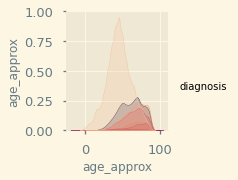

In [152]:
plt.figure(figsize=(25,5))
sns.pairplot(result, palette="rocket_r", hue="diagnosis")

In [155]:
result['sex'] = result['sex'].replace(['female'],'0')
result['sex'] = result['sex'].replace(['male'],'1')
result


,age_approx,anatom_site_general,sex,diagnosis
1,70.0,posterior torso,1,NV
2,65.0,palms/soles,1,NV
6,30.0,NaN,0,NV
10,35.0,anterior torso,1,NV
11,50.0,anterior torso,1,NV
...,...,...,...,...
25306,40.0,palms/soles,1,MEL
25315,55.0,anterior torso,0,MEL
25318,60.0,lower extremity,1,MEL
25319,60.0,palms/soles,1,MEL


In [158]:
result['diagnosis'] = result['diagnosis'].replace(['NV','BCC','AK','BKL','DF','VASC','SCC','MEL'], [0, 1, 2, 3, 4, 5, 6, 7])
result

,age_approx,anatom_site_general,sex,diagnosis
1,70.0,posterior torso,1,0
2,65.0,palms/soles,1,0
6,30.0,NaN,0,0
10,35.0,anterior torso,1,0
11,50.0,anterior torso,1,0
...,...,...,...,...
25306,40.0,palms/soles,1,7
25315,55.0,anterior torso,0,7
25318,60.0,lower extremity,1,7
25319,60.0,palms/soles,1,7


In [159]:
result.anatom_site_general.unique()

array(['posterior torso', 'palms/soles', nan, 'anterior torso',
       'head/neck', 'upper extremity', 'lower extremity', 'oral/genital',
       'lateral torso'], dtype=object)

In [173]:
result['anatom_site_general"] = rsult["anatom_site_general"].replace(['posterior torso', 'palms/soles', 'anterior torso',
       'head/neck', 'upper extremity', 'lower extremity', 'oral/genital',
       'lateral torso'], [1, 2, 3, 4, 5, 6, 7, 8])


SyntaxError: invalid syntax (<ipython-input-173-ccc6a29f72b1>, line 1)

In [174]:
result["anatom_site_general"]= result["anatom_site_general"].replace(["posterior torso", "palms/soles", "anterior torso",
       "head/neck", 'upper extremity', 'lower extremity', 'oral/genital', 'lateral torso'], [1, 2, 3, 4, 5, 6, 7, 8])

In [175]:
result

,age_approx,anatom_site_general,sex,diagnosis
1,70.0,1.0,1,0
2,65.0,2.0,1,0
6,30.0,NaN,0,0
10,35.0,3.0,1,0
11,50.0,3.0,1,0
...,...,...,...,...
25306,40.0,2.0,1,7
25315,55.0,3.0,0,7
25318,60.0,6.0,1,7
25319,60.0,2.0,1,7


In [177]:
result["anatom_site_general"].fillna(0, inplace = True)
result

,age_approx,anatom_site_general,sex,diagnosis
1,70.0,1.0,1,0
2,65.0,2.0,1,0
6,30.0,0.0,0,0
10,35.0,3.0,1,0
11,50.0,3.0,1,0
...,...,...,...,...
25306,40.0,2.0,1,7
25315,55.0,3.0,0,7
25318,60.0,6.0,1,7
25319,60.0,2.0,1,7


<Figure size 1800x360 with 0 Axes>

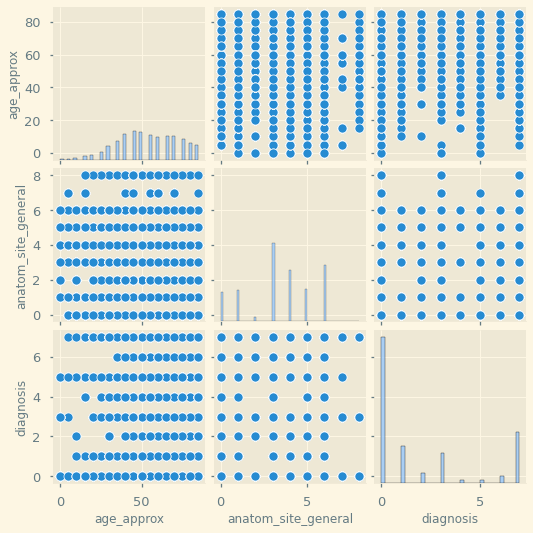

In [180]:
plt.figure(figsize=(25,5))
sns.pairplot(result, palette="rocket_r")

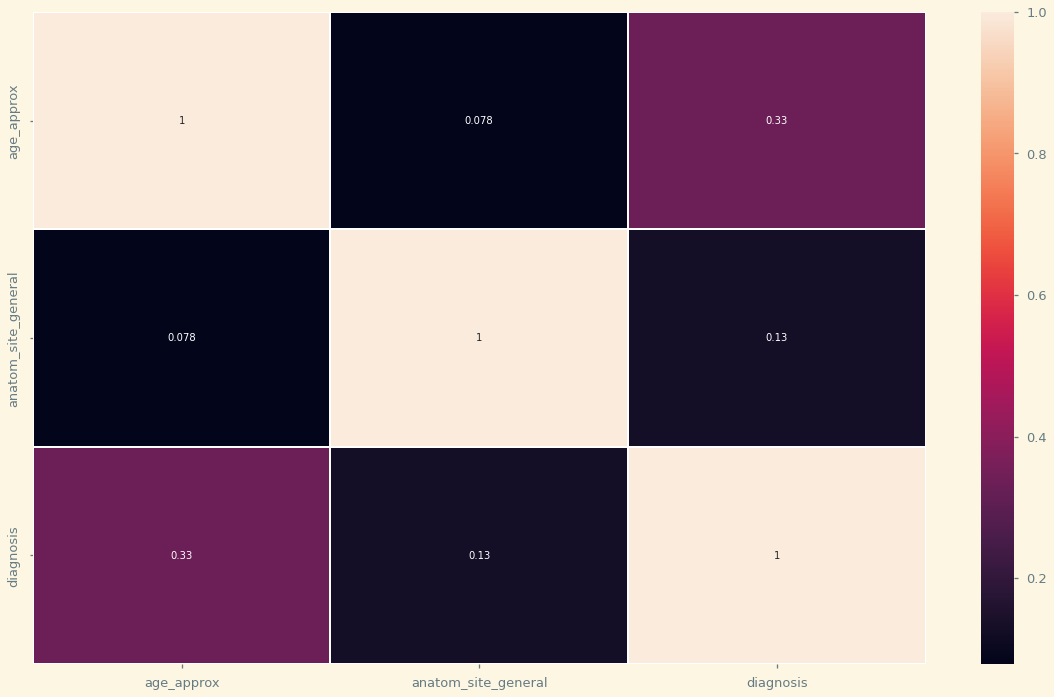

In [184]:
sns.heatmap(result.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [204]:
result2

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,diagnosis
1,ISIC_0030839,70.0,posterior torso,HAM_0006926,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0065677,65.0,palms/soles,BCN_0001036,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
6,ISIC_0028723,30.0,NaN,HAM_0007160,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
10,ISIC_0033669,35.0,anterior torso,HAM_0006182,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
11,ISIC_0068223,50.0,anterior torso,BCN_0001653,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25306,ISIC_0058753,40.0,palms/soles,BCN_0000418,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25315,ISIC_0056849,55.0,anterior torso,BCN_0001513,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25318,ISIC_0033886,60.0,lower extremity,HAM_0003556,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
25319,ISIC_0072654,60.0,palms/soles,BCN_0004405,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [207]:
def grid_display(list_of_images, no_of_columns=2, figsize=(15,15), title = False):
    fig = plt.figure(figsize=figsize)
    column = 0
    z = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        if title:
            if i >= no_of_columns:
                plt.title(titles[z])
                z +=1
            else:
                plt.title(titles[i])
        plt.imshow(list_of_images[i])
        plt.axis('off')

# Melanoma Images

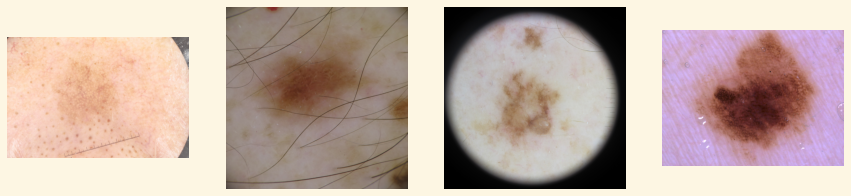

In [208]:
from PIL import Image
image_list = result2[result2['diagnosis'] == 'MEL'].sample(4)['image']
image_all=[]
for image_id in image_list:
    image_file = 'Image_dir_2/MEL_images/'+image_id+'.jpg' 
    img = np.array(Image.open(image_file))
    image_all.append(img)
grid_display(image_all, 4, (15,15))

# Melanocytic nevus Images

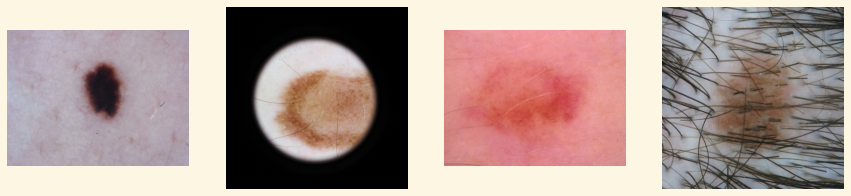

In [210]:
from PIL import Image
image_list = result2[result2['diagnosis'] == 'NV'].sample(4)['image']
image_all=[]
for image_id in image_list:
    image_file = 'Image_dir_2/NV_images/'+image_id+'.jpg' 
    img = np.array(Image.open(image_file))
    image_all.append(img)
grid_display(image_all, 4, (15,15))

# Basal cell carcinoma Images

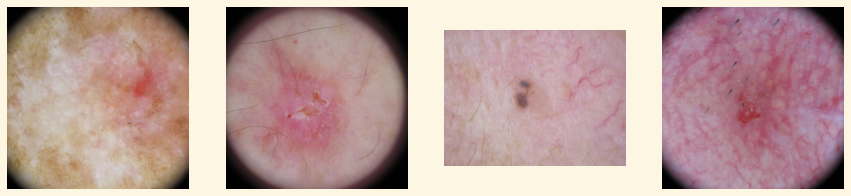

In [211]:
from PIL import Image
image_list = result2[result2['diagnosis'] == 'BCC'].sample(4)['image']
image_all=[]
for image_id in image_list:
    image_file = 'Image_dir_2/BCC_images/'+image_id+'.jpg' 
    img = np.array(Image.open(image_file))
    image_all.append(img)
grid_display(image_all, 4, (15,15))

# Actinic keratosis Images

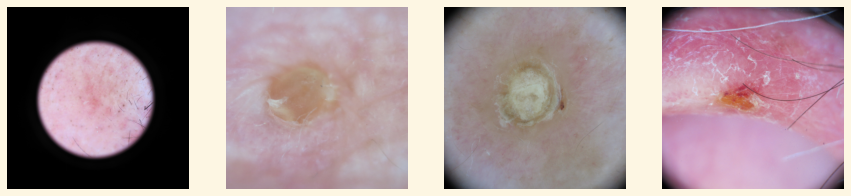

In [212]:
from PIL import Image
image_list = result2[result2['diagnosis'] == 'AK'].sample(4)['image']
image_all=[]
for image_id in image_list:
    image_file = 'Image_dir_2/AK_images/'+image_id+'.jpg' 
    img = np.array(Image.open(image_file))
    image_all.append(img)
grid_display(image_all, 4, (15,15))

# Benign keratosis images

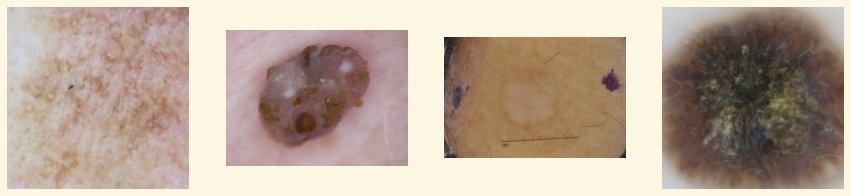

In [214]:
from PIL import Image
image_list = result2[result2['diagnosis'] == 'BKL'].sample(4)['image']
image_all=[]
for image_id in image_list:
    image_file = 'Image_dir_2/BKL_images/'+image_id+'.jpg' 
    img = np.array(Image.open(image_file))
    image_all.append(img)
grid_display(image_all, 4, (15,15))

# Dermatofibroma

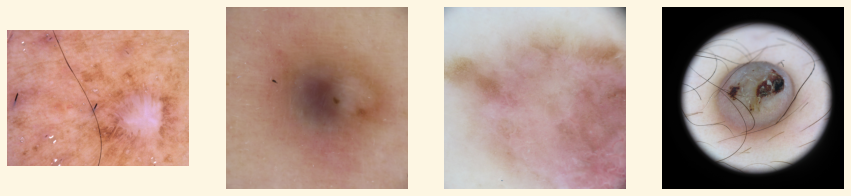

In [215]:
from PIL import Image
image_list = result2[result2['diagnosis'] == 'DF'].sample(4)['image']
image_all=[]
for image_id in image_list:
    image_file = 'Image_dir_2/DF_images/'+image_id+'.jpg' 
    img = np.array(Image.open(image_file))
    image_all.append(img)
grid_display(image_all, 4, (15,15))

# Vascular lesion

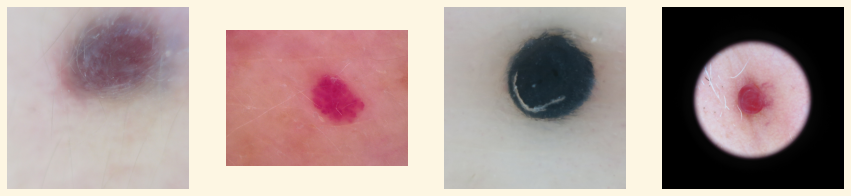

In [216]:
from PIL import Image
image_list = result2[result2['diagnosis'] == 'VASC'].sample(4)['image']
image_all=[]
for image_id in image_list:
    image_file = 'Image_dir_2/VASC_images/'+image_id+'.jpg' 
    img = np.array(Image.open(image_file))
    image_all.append(img)
grid_display(image_all, 4, (15,15))

# Squamous cell carcinoma

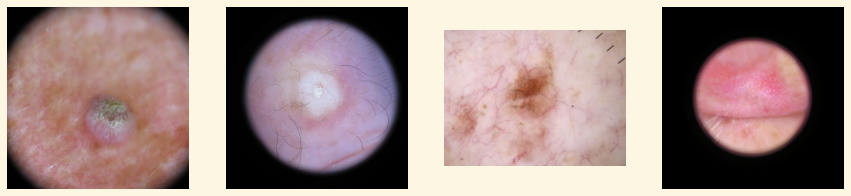

In [217]:
from PIL import Image
image_list = result2[result2['diagnosis'] == 'SCC'].sample(4)['image']
image_all=[]
for image_id in image_list:
    image_file = 'Image_dir_2/SCC_images/'+image_id+'.jpg' 
    img = np.array(Image.open(image_file))
    image_all.append(img)
grid_display(image_all, 4, (15,15))